# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### 1 Define the problem

We have three datasets (train features, train salary, and test features) and are trying to predict the salary for the test features dataset according to the relation between the independent variables provided in the train features dataset: job Id, company Id, job Type, degree, major, industry, years of experience and miles from metropolis and the target variable which is salary.

In [1]:
#Author and Contact Information
__author__ = "Luke Marston"
__email__ = "lmarston2017@gmail.com"


In [2]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


print(matplotlib.__version__)
print(sns.__version__)

3.1.0
0.9.0


## Part 2 - DISCOVER

### 2.1 Load the data 

In [3]:
#load data into Pandas dataframes
train_feature_df = pd.read_csv('data/train_features.csv')
train_target_df = pd.read_csv('data/train_salaries.csv')
test_feature_df = pd.read_csv('data/test_features.csv')

### 2.2 Examine the data 

In [4]:
train_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [5]:
test_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [6]:
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


### data frame types and lengths

In [7]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


### 3 Clean the data 
---

In [13]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

#### Check for duplicates in each data frame

In [10]:
train_feature_df.duplicated().sum()

0

In [11]:
train_target_df.duplicated().sum()

0

In [12]:
test_feature_df.duplicated().sum()

0

No duplicates found in any of the data sets.

### 4 Exploratory Data Analysis (EDA)

In [17]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

#### Identify categorical and numerical variables

In [13]:
train_feature_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [14]:
categorical_columns = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

In [15]:
numberical_columns = ['yearsExperience', 'milesFromMetropolis']

#### Summarize catergorical and numerical variables

In [16]:
train_feature_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [17]:
train_feature_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685024926,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


#### Merge features and targets into single dataframe 

In [18]:
train_df = pd.merge(train_feature_df, train_target_df, on='jobId')

In [19]:
#del train_feature_df 
#del train_target_df 

del train_feature_df
del train_target_df

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [21]:
train_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Visualize 'Salary' variable (The target)

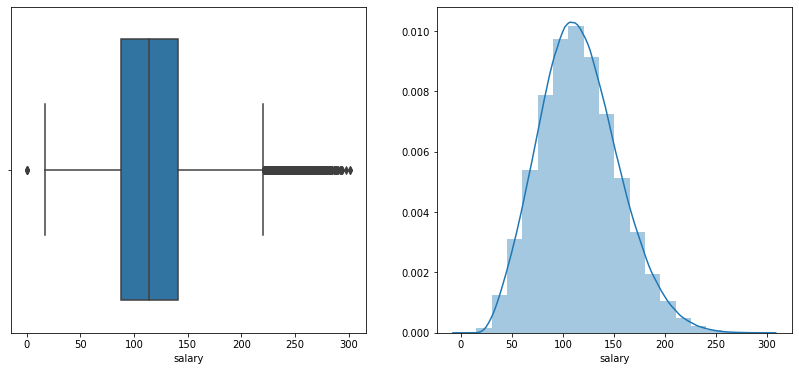

In [22]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

### Identify potential outliers using IQR Rule

In [23]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for potential outliers are {} and {}.'.format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for potential outliers are 220.5 and 8.5.


### Examine the outliers

In [24]:
#Checking for outliers above the upper bound
train_df.loc[train_df.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [25]:
#Checking for outliers below the lower bound
train_df.loc[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


##### There is no reason to believe that the entries with a salary of zero dollars are volunteer/nonprofit work. Therefore, we are confident that data is missing and we can remove the entries from the training set.  

In [26]:
#Further examine suspicious outliers above the upper bound
#i.e 'junior' roles making above 220.5 (IQR upper threshold)
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


##### All of the entries above the upper IQR value (220.5) seem to be legitimate. Most of the roles are executive level and/or have ~20+ years of the experience in high paying industries. Therefore, we will not be removing these entries from the training set.

In [27]:
# Removing data entries with zero salary
train_df = train_df[train_df.salary > 8.5]

In [28]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

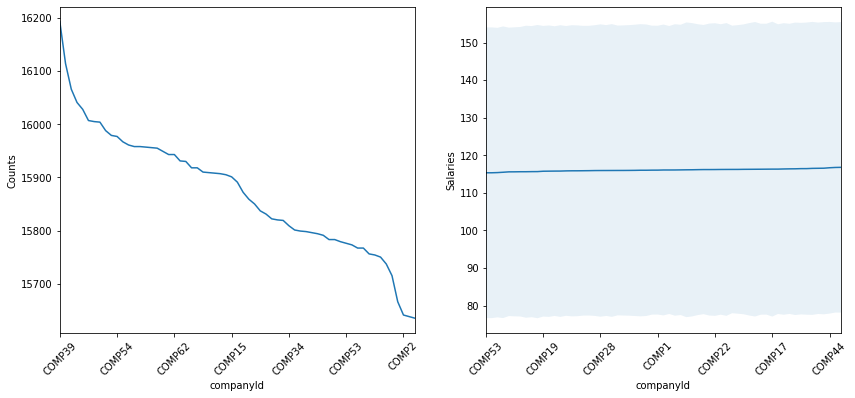

In [29]:
plot_feature(train_df, 'companyId')

#### CompanyID has a weak correlation with salary prediction

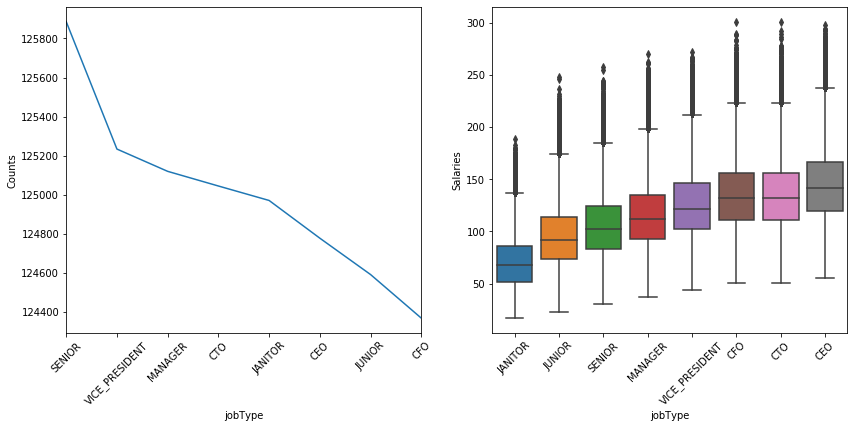

In [30]:
plot_feature(train_df, 'jobType')

#### There is a positive correlation between the job type and the salary they make, with management and executive roles (CFO, CTO, CEO) making the most money.

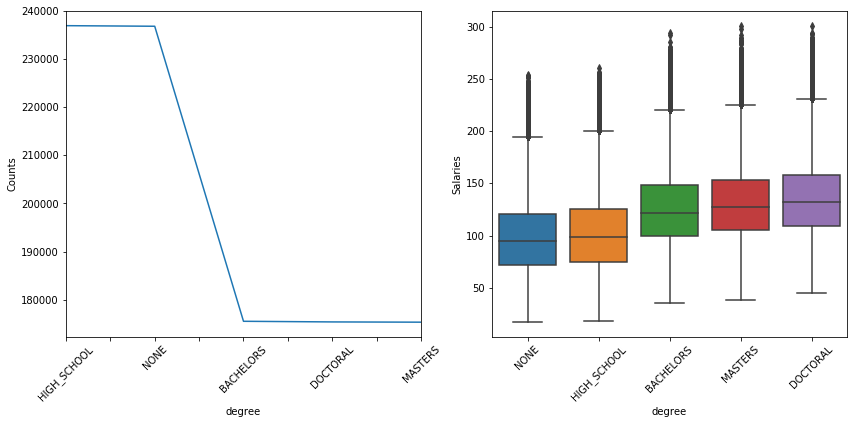

In [31]:
plot_feature(train_df, 'degree')

#### Entries with degrees in high education typically make more. Most noteable is the jump in salary from a High School diploma to a Bachelors degree.

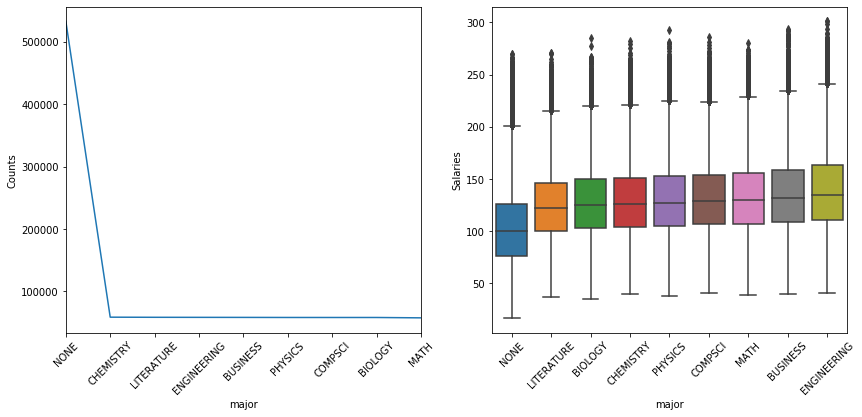

In [32]:
plot_feature(train_df, 'major')

#### Although there is not a huge trend, the entries with the majors of Engineering, Business, and Math have the highest salaries

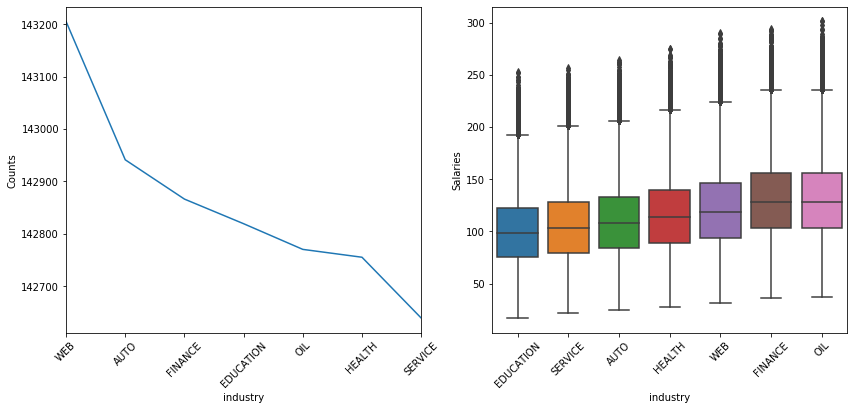

In [33]:
plot_feature(train_df, 'industry')

#### The entries in the Oil, Finance, and Web industries have the highest salaries

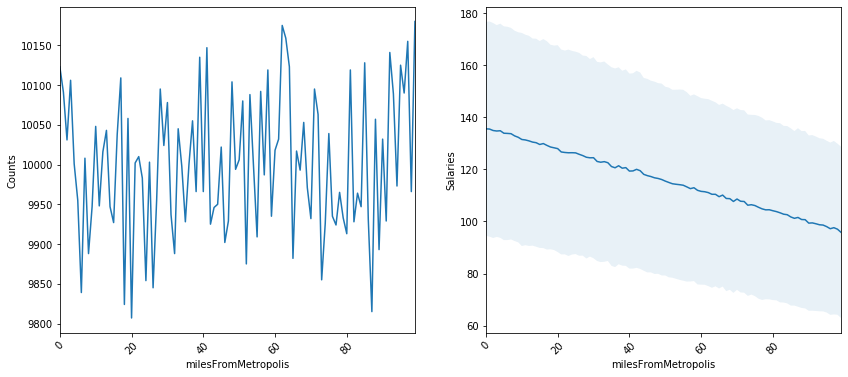

In [34]:
plot_feature(train_df, 'milesFromMetropolis')

The salaries typically decrease the further from a metropolis someone lives

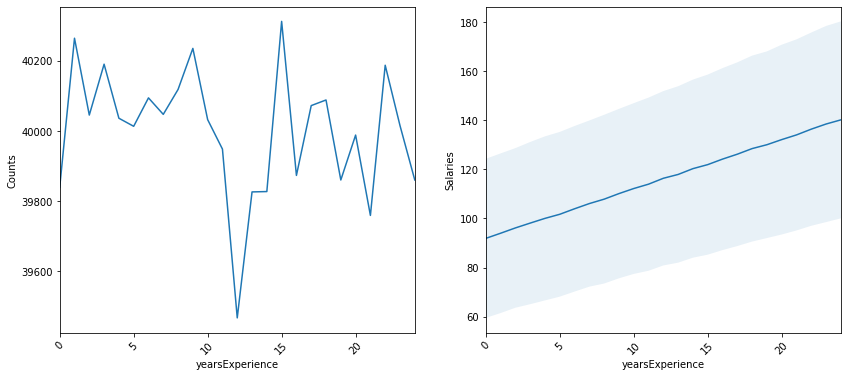

In [35]:
plot_feature(train_df, 'yearsExperience')

#### There is a strong positive correlation between the years of experience someone has their salary

In [61]:
train_df.dtypes

jobId                  float64
companyId              float64
jobType                float64
degree                 float64
major                  float64
industry               float64
yearsExperience          int64
milesFromMetropolis      int64
salary                   int64
dtype: object

In [42]:
cat_vars = [var for var in train_df.columns if train_df[var].dtypes == 'O']
for col in cat_vars:
    train_df[col] = train_df[col].astype('category')
    

In [43]:
cat_vars

['jobId']

In [44]:
#encode the categories using average salary for each category to replace label
def encode_label(df, col):
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()
        df[col] = df[col].map(cat_dict)

In [46]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)

In [47]:
train_df.dtypes

jobId                  float64
companyId              float64
jobType                float64
degree                 float64
major                  float64
industry               float64
yearsExperience          int64
milesFromMetropolis      int64
salary                   int64
dtype: object

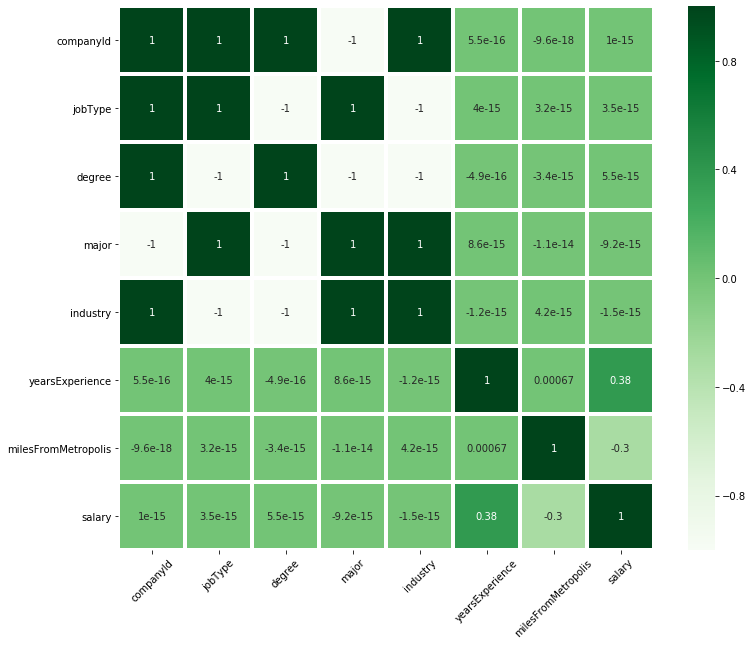

In [48]:
# Observe correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']

for feature in features:
    if train_df[feature].dtypes.name == 'category':
        train_df[feature] = train_df[feature].astype(np.int64)

sns.heatmap(train_df[features + ['salary']].corr(), cmap='Greens', annot=True,center= 0, linewidths=3)

plt.xticks(rotation=45)
plt.show()

We see that jobType is most strongly correlated with salary, followed by degree, major, and yearsExperience. Among the features, we see that degree and major have a strong degree of correlation and jobType has a moderate degree of correlation with both degree and major.

### ---- 5 Establish a baseline ----

In [86]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train_df[['yearsExperience']], train_df['salary'])
print("salary = " + str(lm.coef_[0]) + " * yearsExperience + " + str(lm.intercept_))

salary = 2.01312677816126 * yearsExperience + 91.92016272211175


In [87]:
y_hat = lm.coef_[0]* train_df[['yearsExperience']]+lm.intercept_
sk.metrics.mean_squared_error(y_hat,train_df['salary'])

1288.202874321744

In [88]:
#5-fold cross-validation
Rcross = sk.model_selection.cross_val_score(lm,train_df[['yearsExperience']],train_df['salary'], cv=5)
Rcross

array([0.14132088, 0.14246846, 0.13849021, 0.13882048, 0.14201107])

In [89]:
print("The Mean of the folds are", Rcross.mean(), "and the standard deviation is", Rcross.std())

The Mean of the folds are 0.14062221908143122 and the standard deviation is 0.001650294899680554


The (hypothetical) baseline Mean Squared Error (MSE) is 1288

In [93]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(matplotlib.__version__)

3.1.1


In [94]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### ---- 6 Hypothesize solution ----

In [78]:
#3 models that may improve results over the baseline model based on EDA
#1.Linear Regression, 2.Random Forest Regression, 3.Gradient Boosting Regression

Based on the findings from the EDA above, a few models that I believe could greatly improve the accuracy results from the baseline prediction above (MSE = 1288) include:

1.Linear Regression: *insert rationale here* 

2.Random Forest Regression: *insert rationale here*

3.Gradient Boosting Regression: *insert rationale here*


## Part 3 - DEVELOP

#### The metric to track which is the best performing model will be MSE and the goal is:
 - <360 MSE

### ---- 7 Engineer features  ----

In [97]:
#make sure that data is ready for modeling
#create any new features and/or functions needed to potentially enhance model

def load_file(file):
    '''loads csv to pd dataframe'''
    return pd.read_csv(file)

def consolidate_data(df1, df2, key=None, left_index=False, right_index=False):
    '''perform inner join to only return entries that are in both dataframes'''
    return pd.merge(left=df1, right=df2, how='inner', on=key, left_index=left_index, right_index=right_index)

def clean_data(raw_df):
    '''removes the rows that have a salary <= 0 or duplicate jobIds'''
    clean_df = raw_df.drop_duplicates(subset='jobId')
    clean_df = clean_df[clean_df.salary>0]
    return clean_df

def one_hot_encode_feature_df(df, cat_vars=None, num_vars=None):
    '''performs one-hot encoding on all categorical variables and combines the results with continuous variables'''
    cat_df = pd.get_dummies(df[cat_vars])
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis=1)#,ignore_index=False

def get_target_df(df, target):
    '''returns target dataframe'''
    return df[target]

def train_model(model, feature_df, target_df, num_proces, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)

def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

def save_results(model, mean_mse, predictions, feature_importances):
    '''saves the model, model summary, feauture importances, and predictions'''
    with open('model.txt', 'w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv')
    np.savetxt('predictions.csv', predictions, delimiter=',')


In [99]:
#define inputs
train_feature_file = 'data/train_features.csv'
train_target_file = 'data/train_salaries.csv'
test_feature_file = 'data/test_features.csv'

#define variables
categorical_vars = ['companyId', 'jobType', 'degree', 'major', 'industry']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'

#load data
print("Loading the data")
feature_df = load_file(train_feature_file)
target_df = load_file(train_target_file)
test_df = load_file(test_feature_file)

#consolidate the training data
raw_train_df = consolidate_data(feature_df, target_df, key='jobId')

#clean, shuffle, and reindex training data 
#shuffling improves cross-validation accuracy
clean_train_df = shuffle(clean_data(raw_train_df)).reset_index()

#encode categorical data and get final feature dataframes
print("Encoding the data")
feature_df = one_hot_encode_feature_df(clean_train_df, cat_vars=categorical_vars, num_vars=numeric_vars)
test_df = one_hot_encode_feature_df(test_df, cat_vars=categorical_vars, num_vars=numeric_vars)

#get target df
target_df = get_target_df(clean_train_df, target_var)


Loading the data
Encoding the data


In [106]:
#initialize model list and dicts
models = []
mean_mse = {}
cv_std = {}
res = {}

#define number of precesses to run in parallel
num_procs = 2

#shared model parameters
verbose_lvl = 0


### ---- 8 Create & Test models ----

In [ ]:
#create and tune the models 

lr = LinearRegression()
lr_std_pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())
rf = RandomForestRegressor(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=60, max_features=30, verbose=verbose_lvl)
gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=verbose_lvl)

models.extend([lr, lr_std_pca, rf, gbm])
#parallel cross-validate models, using MSE metric to evaluate the models, and print summaries
print("Beginning cross validation")
for model in models:
    train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

Beginning cross validation

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE:
 384.4728115026793
Standard deviation during CV:
 0.4038751195438124

Model:
 Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Average MSE:
 384.4710518462946
Standard deviation during CV:
 0.4064810613356542

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=30, max_leaf_nodes=None,
                      min_impurity_decreas

## Part 4 - DEPLOY

### ---- 9 Select best model & Automate pipeline  ----

In [112]:
#select the model with the lowest mse
model = min(mean_mse, key=mean_mse.get)
print ('\nPredictions calculated using model with lowest MSE:')
print(model)

#train model on entire dataset
model.fit(feature_df, target_df)

#create predictions based on test data
predictions = model.predict(test_df)


Predictions calculated using model with lowest MSE:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### ---- 12 Deploy solution ----

In [117]:
#store feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    #linear models don't have feature_importances_
    importances = [0]*len(feature_df.columns)
    
feature_importances = pd.DataFrame({'feature':feature_df.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

#save results
save_results(model, mean_mse[model], predictions, feature_importances)

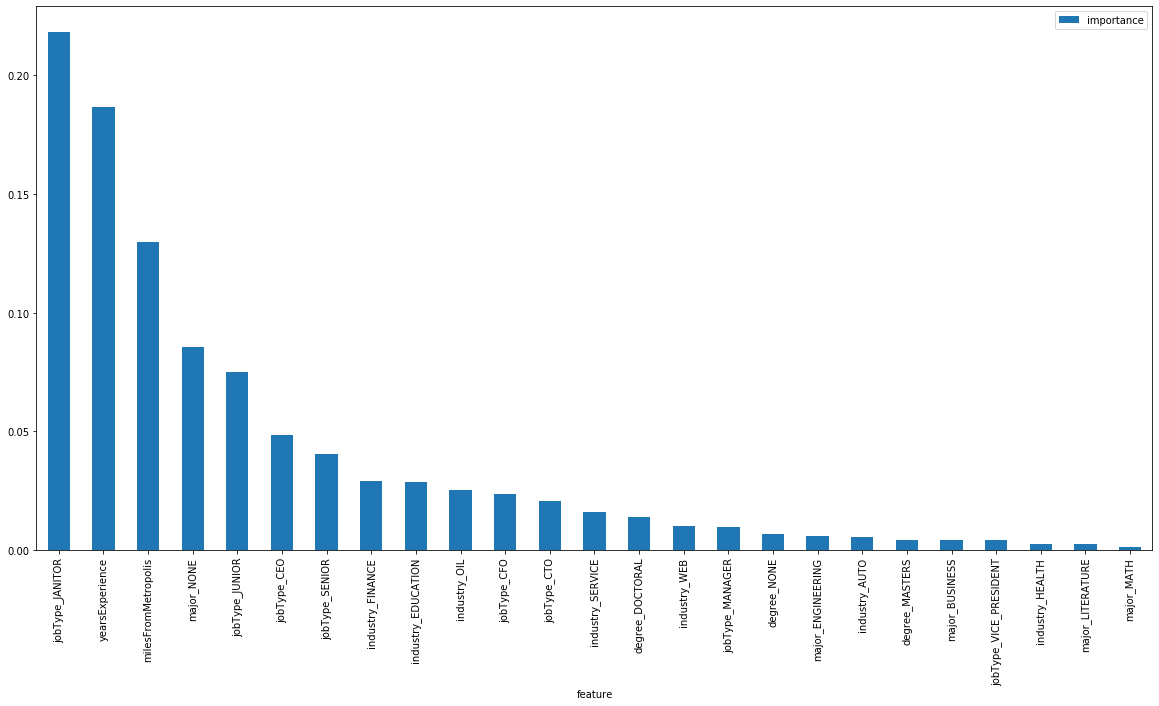

In [119]:
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.show()

In [120]:
!cat model.txt

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [121]:
!head feature_importances.csv

feature,importance
jobType_JANITOR,0.2182849026792504
yearsExperience,0.18671955106767502
milesFromMetropolis,0.12977144934595455
major_NONE,0.08562541642549382
jobType_JUNIOR,0.07476353234819393
jobType_CEO,0.04849364507500882
jobType_SENIOR,0.040218987146969316
industry_FINANCE,0.02897898740675115
industry_EDUCATION,0.028568660279792952


In [122]:
!head predictions.csv

1.112319470299430861e+02
9.358076805149362087e+01
1.789313055117168290e+02
1.043686516871995735e+02
1.170745237113820707e+02
1.507164339871131062e+02
9.642931186092509677e+01
1.185500271711061515e+02
1.069490341265070015e+02
9.826842079587609646e+01


### ---- 13 Measure Model Performance ----

The baseline resulted in a MSE of 1288 and after the creating our model (Gradient Boosting Regression), we were able to reduce the MSE to 357.55

A reduction of ~72%. Thus, our final model is must more accurate in predicting salaries given the features/variables in our problem.